# Detection of Cardiomegaly from Chest X-Ray Images

ChestX-ray dataset comprises 112,120 frontal-view X-ray images of 30,805 unique patients with the text-mined fourteen disease image labels (where each image can have multi- labels), mined from the associated radiological reports using natural language processing. Fourteen common thoracic pathologies include Atelectasis, Consolidation, Infiltration, Pneumothorax, Edema, Emphysema, Fibrosis, Effusion, Pneumonia, Pleural_thickening, Cardiomegaly, Nodule, Mass and Hernia.

In [127]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
df=pd.read_csv("/Users/neeharika/Documents/datascience-course/Data-Analysis/Data_Entry_2017.csv") 
print(df.head(3))

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
Image Index                    112120 non-null object
Finding Labels                 112120 non-null object
Follow-up #                    112120 non-null int64
Patient ID                     112120 non-null int64
Patient Age                    112120 non-null int64
Patient Gender                 112120 non-null object
View Position                  112120 non-null object
OriginalImage[Width            112120 non-null int64
Height]                        112120 non-null int64
OriginalImagePixelSpacing[x    112120 non-null float64
y]                             112120 non-null float64
Unnamed: 11                    0 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


Renaming to the columns for consistancy

In [130]:
df.rename(columns={'Image Index':'img_index','Finding Labels':'labels','Follow-up #':'follow_up','Patient ID':'pa_id',
                   'Patient Age':'pa_age','Patient Gender':'pa_gender','View Position':'view_position'}, inplace=True)

Checking for null values in each column

In [131]:
df["img_index"].isnull().values.any()

False

In [132]:
df["labels"].isnull().values.any()

False

In [133]:
df["follow_up"].isnull().values.any()

False

In [134]:
df["pa_id"].isnull().values.any()

False

In [135]:
df["pa_age"].isnull().values.any()

False

In [136]:
df["pa_gender"].isnull().values.any()

False

In [137]:
df.groupby('pa_gender').size()

pa_gender
F    48780
M    63340
dtype: int64

df.groupby('pa_age').size()

checking for outliers in age column and considering the age 117 years are to be feasible

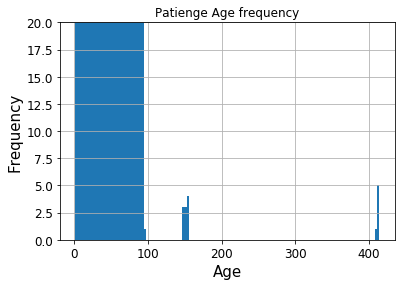

In [139]:
df['pa_age'].hist(bins=150, grid=True, xlabelsize=12, ylabelsize=12)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.ylim(0,20)
plt.title('Patienge Age frequency')
plt.show()

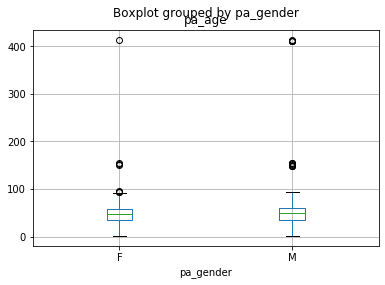

In [140]:
df.boxplot(column='pa_age',by='pa_gender')
plt.show()

Tiday Data 

In [141]:
Age_below_117 = df['pa_age'] < 117 
df[Age_below_117]
tidy_df=df[Age_below_117]
tidy_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112104 entries, 0 to 112119
Data columns (total 12 columns):
img_index                      112104 non-null object
labels                         112104 non-null object
follow_up                      112104 non-null int64
pa_id                          112104 non-null int64
pa_age                         112104 non-null int64
pa_gender                      112104 non-null object
view_position                  112104 non-null object
OriginalImage[Width            112104 non-null int64
Height]                        112104 non-null int64
OriginalImagePixelSpacing[x    112104 non-null float64
y]                             112104 non-null float64
Unnamed: 11                    0 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 11.1+ MB


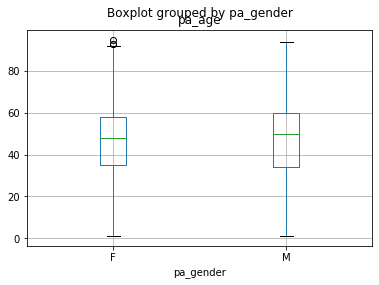

In [142]:
tidy_df.boxplot(column='pa_age',by='pa_gender')
plt.show()

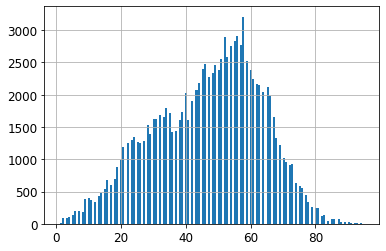

In [143]:
tidy_df['pa_age'].hist(bins=150, grid=True, xlabelsize=12, ylabelsize=12)
plt.show()